# Chapter 7:  Data Science

## Ingest

*COVID-19 Data from [New York Times Github](https://github.com/nytimes/covid-19-data)*

In [1]:
import pandas as pd
df = pd.read_csv("us-states.csv")
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


Last five rows

In [2]:
df.tail()

,date,state,fips,cases,deaths
61937,2023-03-23,Virginia,51,2298300,23782
61938,2023-03-23,Washington,53,1940704,15905
61939,2023-03-23,West Virginia,54,645710,8132
61940,2023-03-23,Wisconsin,55,2014524,16485
61941,2023-03-23,Wyoming,56,185800,2014


*What are the columns?*

In [3]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

*What is the shape:  i.e. rows,columns?*

In [4]:
df.shape

(61942, 5)

## EDA

*What are general characteristics of the data?  A good way to find out is `df.describe`*

In [5]:
df.describe()

,fips,cases,deaths
count,61942.000000,6.194200e+04,61942.000000
mean,32.247958,8.898301e+05,11779.067499
std,18.788383,1.470231e+06,17345.774849
min,1.000000,1.000000e+00,0.000000
25%,17.000000,7.078350e+04,1171.000000
50%,31.000000,3.514960e+05,5035.000000
75%,46.000000,1.043231e+06,14912.000000
max,78.000000,1.216916e+07,104277.000000


*Cases and Deaths in the USA due to Covid-19*

<Axes: xlabel='cases', ylabel='deaths'>

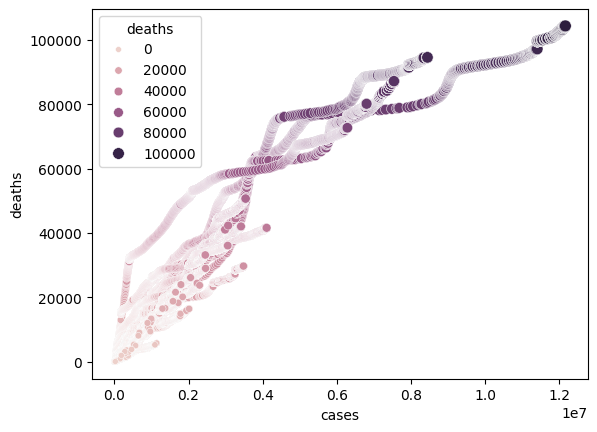

In [6]:
import seaborn as sns
sns.scatterplot(x="cases", y="deaths",
                hue="deaths",size="deaths", data=df)

### Date-based EDA

*Dealing with dates by setting index*

In [7]:
df = pd.read_csv("us-states.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
print(f"Columns: {df.columns}")
df.index

Columns: Index(['state', 'fips', 'cases', 'deaths'], dtype='object')


DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-24', '2020-01-25', '2020-01-25', '2020-01-25',
               '2020-01-26', '2020-01-26',
               ...
               '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
               '2023-03-23', '2023-03-23', '2023-03-23', '2023-03-23',
               '2023-03-23', '2023-03-23'],
              dtype='datetime64[ns]', name='date', length=61942, freq=None)

*Filter results by date range*

In [11]:
from datetime import date, timedelta
today = date.today()
daybefore = today - timedelta(days = 1040)
print(f"Today {today}")
print(f"Two days ago {daybefore}")

Today 2025-06-02
Two days ago 2022-07-28


In [12]:
df.loc[daybefore:today].head()

,state,fips,cases,deaths
date,,,,
2022-07-28,Alabama,1,1421760,19890
2022-07-28,Alaska,2,281969,1270
2022-07-28,American Samoa,60,7471,33
2022-07-28,Arizona,4,2196429,30768
2022-07-28,Arkansas,5,901129,11699


*The distribution of the data by date*

<Axes: xlabel='deaths', ylabel='Density'>

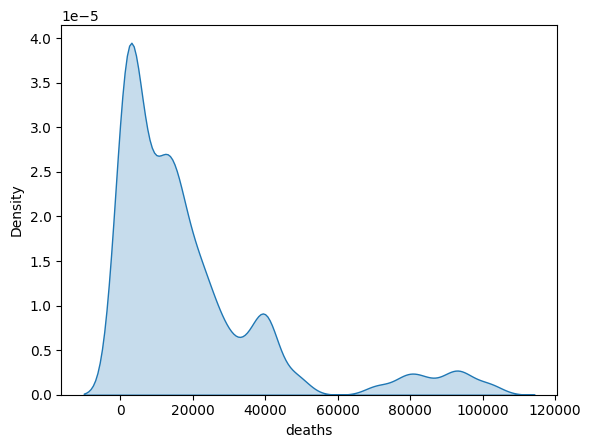

In [25]:
sns.kdeplot(df.loc[daybefore:today]["deaths"], fill=True)

*Sort DataFrame in place by states with highest deaths and cases and show first 10 results*

In [14]:
current_df = df.loc[daybefore:today].sort_values(by=["deaths", "cases"], ascending=False)
current_df.head(10)

,state,fips,cases,deaths
date,,,,
2023-03-23,California,6,12169158,104277
2023-03-22,California,6,12155467,104196
2023-03-21,California,6,12154941,104185
2023-03-20,California,6,12154293,104165
2023-03-19,California,6,12153083,104130
2023-03-17,California,6,12153079,104130
2023-03-18,California,6,12153079,104130
2023-03-16,California,6,12152129,104114
2023-03-15,California,6,12136243,104047


*There should be 50 states and District of Columbia*

In [15]:
current_df.shape

(13384, 4)

### State Based Analysis

*Get 10 states and subset*

In [16]:
top_ten_states = list(current_df["state"].head(10).values)
top_ten_states

['California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California',
 'California']

In [17]:
top_states_df = df[df['state'].isin(top_ten_states)].drop(columns="fips")

*Verify the unique states left is the same 10*

In [18]:
set(top_states_df.state.values)

{'California'}

<Figure size 1500x500 with 0 Axes>

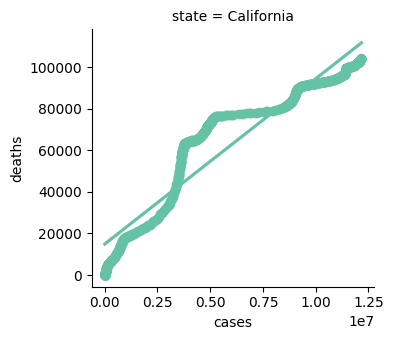

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
ax = sns.lmplot(x="cases", y="deaths",
                    height=3.5,
                    col="state",
                    col_wrap=5,
                    hue="state",
                    palette="Set2",
                    data=top_states_df)
ax.fig.subplots_adjust(wspace=.2)

*Interactive plot of top states*

In [20]:
top_states_march_current_df = top_states_df.loc["2020-03-08":today].sort_values(by=["deaths", "cases"], ascending=True)
top_states_march_current_df.head()

,state,cases,deaths
date,,,
2020-03-08,California,112,1
2020-03-09,California,172,2
2020-03-10,California,179,3
2020-03-11,California,202,4
2020-03-12,California,252,4


In [30]:
# import plotly.io as pio
# pio.renderers.default = 'colab'
# import plotly.express as px
# fig = px.scatter(top_states_march_current_df, x=top_states_march_current_df.index, y="cases", size="deaths", color="state", facet_col="state")
# fig.show()

### Search for Features:  Political, Health and Finance

*Sugar Intake By State*

In [23]:
# cdc_2013 = pd.read_csv("education_sugar_cdc_2003.csv")
# cdc_2013.set_index("State", inplace=True)
# for column in cdc_2013.columns:
#   cdc_2013[column]=cdc_2013[column].str.replace(r"\(.*\)","")
#   cdc_2013[column]=pd.to_numeric(cdc_2013[column])

# cdc_2013.reset_index(inplace=True)
# cdc_2013.rename(columns={"State": "state", "Employed": "employed-sugar-intake-daily"},inplace=True)
# cdc_2013.head()

*Combine Sugar Data and Covid-19 Data*

In [24]:
# cdc_employed_df = cdc_2013[["employed-sugar-intake-daily", "state"]]
# sugar_covid_df = df.merge(cdc_employed_df, how="inner", on="state")
# sugar_covid_df.head()

*What about data from the 2016 Election?*

In [26]:
# election_df = pd.read_csv("2016-Electoral-Votes.csv")
# election_df.rename(columns={"State": "state"},inplace=True)
# election_df.drop(columns="Votes", inplace=True)
# election_df = pd.concat([election_df, pd.get_dummies(election_df["Winning Party"])], axis=1);
# election_df.head()
# #election_df["Republican?"] = pd.get_dummies(election_df, columns=["Winning Party"])
# #election_df.head()

In [27]:
# sugar_covid_df = sugar_covid_df.merge(election_df, how="inner", on="state")
# sugar_covid_df.head()

*Generate Heatmap*

In [28]:
# sugar_covid_df.corr()

In [29]:
# import plotly.graph_objects as go

# fig = go.Figure(data=go.Heatmap(
#                    z=sugar_covid_df.corr(),
#                    x=['fips','cases', 'deaths', 'employed-sugar-intake-daily', 'Democrats', 'Republicans'],
#                    y=['fips','cases', 'deaths', 'employed-sugar-intake-daily', 'Democrats', 'Republicans'],
#                    hoverongaps = False))
# fig.show()

In [ ]:
# sugar_covid_df.to_csv("covid-eda.csv")

*What about Real-Estate Data?*

## Modeling

## Conclusion
